In [1]:
from pipeline import *
from Module import *
from Loss import *

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


from numba import jit
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import zero_one_loss
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from mltools import *

In [2]:
uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)
#neg = 8
#pos = [1,2,3,4,5]
#datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
#testx,testy = get_usps([neg,pos],alltestx,alltesty) 
#print(datax,datay)
# preprocessing 
alltrainx = MinMaxScaler().fit_transform(alltrainx)
alltestx = MinMaxScaler().fit_transform(alltestx)

In [3]:
lin1 = Linear(256, 100)
lin2 = Linear(100, 10)
lin3 = Linear(10, 100)
lin4 = Linear(100, 256)

ae = Sequentiel(lin1,
                TanH(),
                lin2,
                TanH(),
                lin3,
                TanH(),
                lin4,
                Sigmoid()
                )

n_iter = 1000
ep = 1e-3
sq, loss = mini_SGD(ae,alltrainx, alltrainx,batch_size=100,eps=ep, loss_fonction=MSELoss(),nb_iteration=n_iter)

iteration 0 loss = 4695.924975753875
iteration 20 loss = 3415.6490428684756
iteration 40 loss = 3323.1538302866265
iteration 60 loss = 3287.797265318702
iteration 80 loss = 3252.920951357864
iteration 100 loss = 3273.6337414176824
iteration 120 loss = 2863.4121606105905
iteration 140 loss = 2838.9261137079093
iteration 160 loss = 2814.963333962524
iteration 180 loss = 2819.7808538205663
iteration 200 loss = 2769.8313095549574
iteration 220 loss = 2589.382606101937
iteration 240 loss = 2425.591487546812
iteration 260 loss = 2257.0086164081117
iteration 280 loss = 2174.164367694748
iteration 300 loss = 2043.7639021064128
iteration 320 loss = 1876.3436575171509
iteration 340 loss = 1794.9037262334002
iteration 360 loss = 1695.3838773093694
iteration 380 loss = 1604.576096393971
iteration 400 loss = 1513.181387638284
iteration 420 loss = 1471.004076622453
iteration 440 loss = 1434.0196073703357
iteration 460 loss = 1393.2207222758134
iteration 480 loss = 1402.068087225387
iteration 500 los

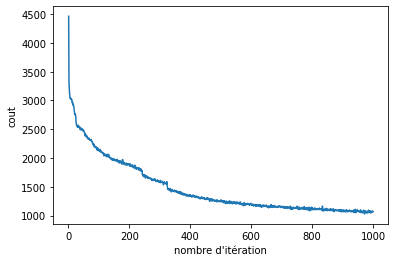

In [4]:
plt.figure()
plt.plot(range(1,n_iter+1),loss)
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
#plt.savefig("img_rapport/cout_auto_mse")
plt.show()

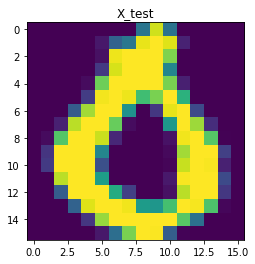

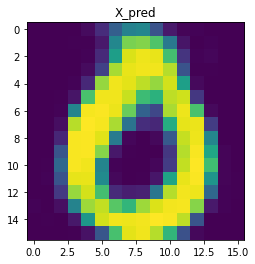

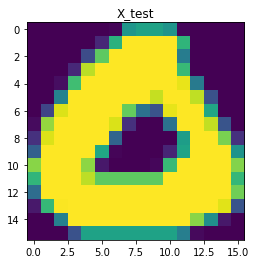

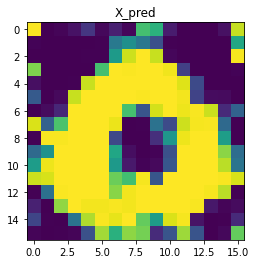

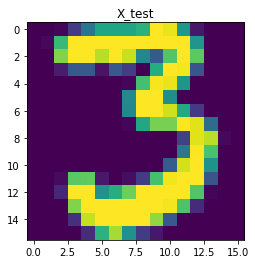

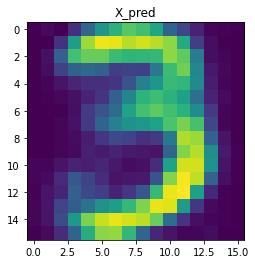

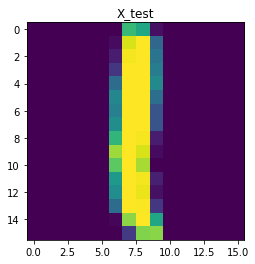

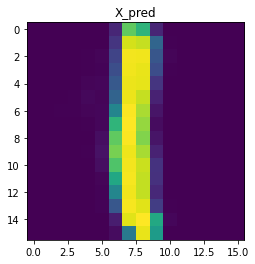

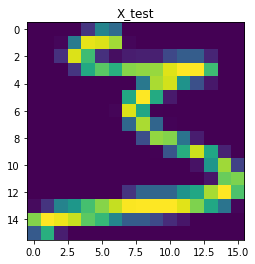

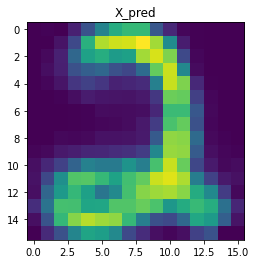

In [5]:
idx = np.random.choice(len(alltestx), 5)   
for j in range(len(idx)):
    i = idx[j]
    plt.title('X_test')
    plt.imshow(alltestx[i].reshape(16,16))
    plt.savefig('img_rapport/X_train_mse-'+str(j))
    plt.show()
    Xhat = ae.forward(alltestx)[-1]

    plt.title('X_pred')
    plt.imshow(Xhat[i].reshape(16,16))
    plt.savefig('img_rapport/y_pred_mse-'+str(j))
    plt.show()

In [6]:
lin1 = Linear(256, 100)
lin2 = Linear(100, 10)
lin3 = Linear(10, 100)
lin4 = Linear(100, 256)

ae = Sequentiel(lin1,
                TanH(),
                lin2,
                TanH(),
                lin3,
                TanH(),
                lin4,
                Sigmoid()
                )

n_iter = 1000
ep = 1e-3
sq, loss = mini_SGD(ae,alltrainx, alltrainx,batch_size=100,eps=ep, loss_fonction=BCELoss(),nb_iteration=n_iter)

iteration 0 loss = 10890.438452385022
iteration 20 loss = 9628.499424231662
iteration 40 loss = 9570.090934323596
iteration 60 loss = 9401.064093197348
iteration 80 loss = 9380.78329757525
iteration 100 loss = 9031.514663014606
iteration 120 loss = 8913.80091584408
iteration 140 loss = 8861.300342107837
iteration 160 loss = 9797.415142380747
iteration 180 loss = 8997.681643479771
iteration 200 loss = 9316.756304144972
iteration 220 loss = 8761.58892164402
iteration 240 loss = 9136.545005046766
iteration 260 loss = 8826.386633021022
iteration 280 loss = 8090.74579458387
iteration 300 loss = 8586.92594102455
iteration 320 loss = 8028.451742029193
iteration 340 loss = 7228.5774596657475
iteration 360 loss = 7969.675327971012
iteration 380 loss = 8262.261114217046
iteration 400 loss = 7633.542847329354
iteration 420 loss = 8242.139126354854
iteration 440 loss = 8518.726368031283
iteration 460 loss = 8224.314875079297
iteration 480 loss = 7396.320611255565
iteration 500 loss = 7764.73266540

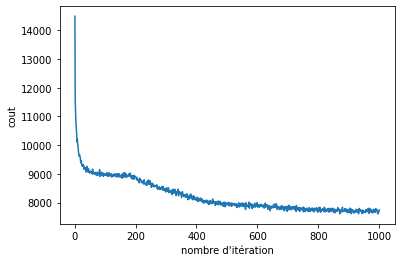

In [7]:
plt.figure()
plt.plot(range(1,n_iter+1),loss)
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
plt.savefig("img_rapport/cout_auto_bce")
plt.show()

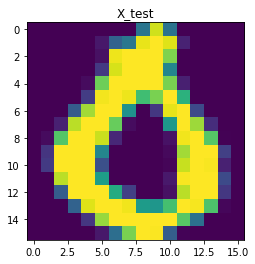

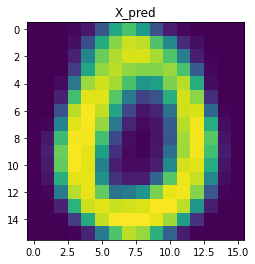

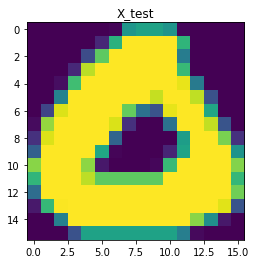

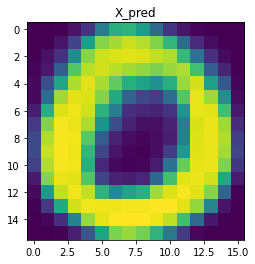

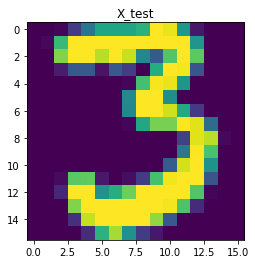

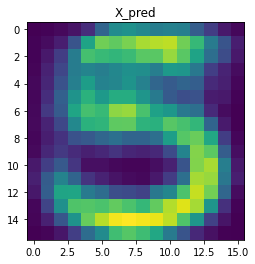

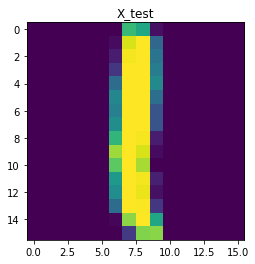

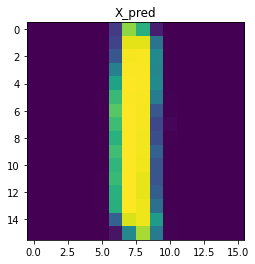

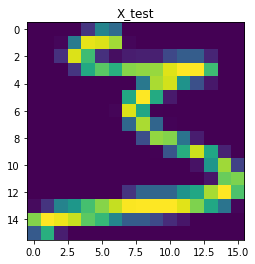

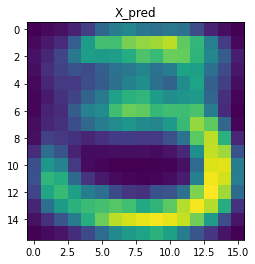

In [19]:
for j in range(len(idx)):
    i = idx[j]
    plt.title('X_test')
    plt.imshow(alltestx[i].reshape(16,16))
    plt.savefig('img_rapport/X_train_bce-'+str(j))
    plt.show()
    Xhat = ae.forward(alltestx)[-1]

    plt.title('X_pred')
    plt.imshow(Xhat[i].reshape(16,16))
    plt.savefig('img_rapport/y_pred_bce-'+str(j))
    plt.show()

In [34]:
from sklearn.metrics.cluster import homogeneity_score
km = KMeans(n_clusters=10)
Xhat = ae.forward(alltrainx)[-1]
ypred = km.fit_predict(Xhat)
print('La pureté des clusters pour train :', homogeneity_score(alltrainy,ypred))

La pureté des clusters pour train : 0.675967052224155


In [35]:
km = KMeans(n_clusters=10)
Xhat = ae.forward(alltestx)[-1]
ypred = km.fit_predict(Xhat)
print('La pureté des clusters pour test :', homogeneity_score(alltesty,ypred))

La pureté des clusters pour test : 0.6347032592373697


In [37]:
from sklearn.manifold import TSNE 
pca_tsne = TSNE(n_components=2)  

In [38]:
newMat = pca_tsne.fit_transform(alltestx) 

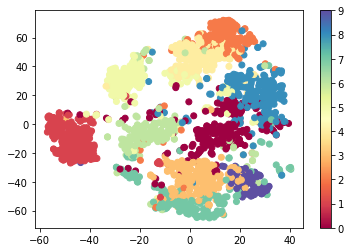

In [39]:
plt.figure()
plt.scatter(newMat[:, 0], newMat[:, 1], c=ypred, cmap=plt.cm.Spectral)
plt.colorbar()
plt.savefig("img_rapport/tsn_test.png")
plt.show()

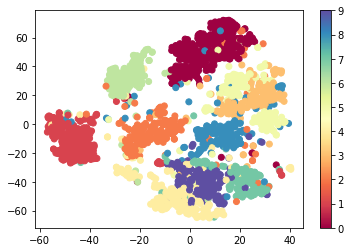

In [40]:
plt.figure()
plt.scatter(newMat[:, 0], newMat[:, 1], c=alltesty, cmap=plt.cm.Spectral)
plt.colorbar()

In [ ]:
uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)

In [42]:
noise_factor = 0.3

alltrainx = MinMaxScaler().fit_transform(alltrainx)
alltestx = MinMaxScaler().fit_transform(alltestx)

alltrainx_noisy = alltrainx + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=alltrainx.shape) 
alltestx_noisy = alltestx + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=alltestx.shape) 

alltrainx_noisy = np.clip(alltrainx_noisy, 0., 1.)
alltestx_noisy = np.clip(alltestx_noisy, 0., 1.)

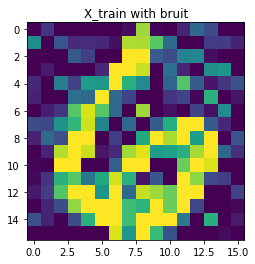

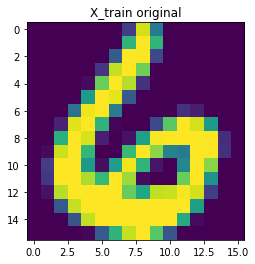

In [45]:
plt.figure()
plt.title('X_train with bruit')
plt.imshow(alltrainx_noisy[0].reshape(16,16))
plt.savefig("img_rapport/x_train_with_bruit")
plt.show()
plt.figure()
plt.title('X_train original')
plt.imshow(alltrainx[0].reshape(16,16))
plt.savefig("img_rapport/x_train_ori")
plt.show()

In [47]:
lin1 = Linear(256, 100)
lin2 = Linear(100, 10)
lin3 = Linear(10, 100)
lin4 = Linear(100, 256)

ae = Sequentiel(lin1,
                TanH(),
                lin2,
                TanH(),
                lin3,
                TanH(),
                lin4,
                Sigmoid()
                )

n_iter = 1000
ep = 1e-3
sq, loss = mini_SGD(ae,alltrainx_noisy, alltrainx, batch_size=100,eps=ep, loss_fonction=BCELoss(),nb_iteration=n_iter)

iteration 0 loss = 13720.114098873924
iteration 20 loss = 13860.035806824786
iteration 40 loss = 14104.193538547303
iteration 60 loss = 13693.670658582918
iteration 80 loss = 13784.42851111684
iteration 100 loss = 13046.091981639434
iteration 120 loss = 11969.126570784392
iteration 140 loss = 10989.653618941022
iteration 160 loss = 11940.010075757047
iteration 180 loss = 11683.02062309524
iteration 200 loss = 11503.409490323707
iteration 220 loss = 11439.04455717625
iteration 240 loss = 11741.069604893804
iteration 260 loss = 11157.926591979794
iteration 280 loss = 11676.496473430243
iteration 300 loss = 10942.300784122783
iteration 320 loss = 10845.508083429386
iteration 340 loss = 10142.253518859598
iteration 360 loss = 10672.405153899157
iteration 380 loss = 10298.244494083901
iteration 400 loss = 9829.023619145955
iteration 420 loss = 9158.11004747682
iteration 440 loss = 9125.95204263795
iteration 460 loss = 9521.43954268816
iteration 480 loss = 9322.548873737398
iteration 500 los

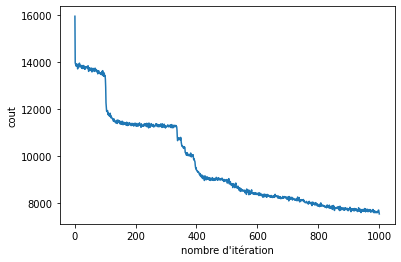

In [48]:
plt.figure()
plt.plot(range(1,n_iter+1),loss)
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
plt.savefig("img_rapport/cout_auto_bruit")
plt.show()

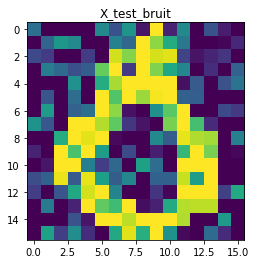

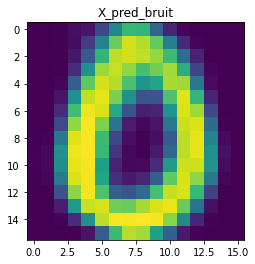

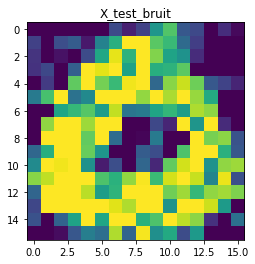

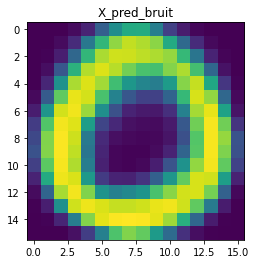

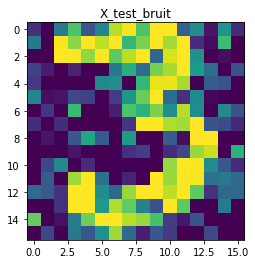

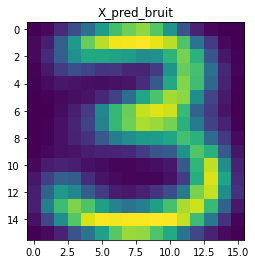

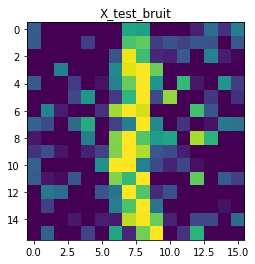

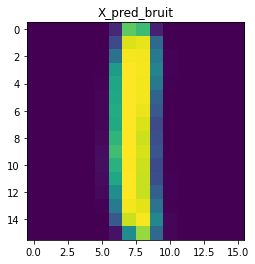

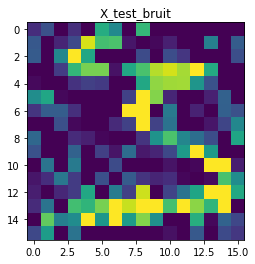

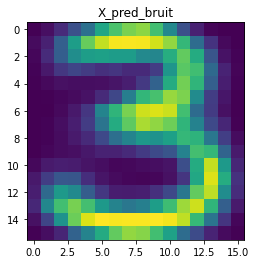

In [65]:
for j in range(len(idx)):
    i = idx[j]
    plt.title('X_test_bruit')
    plt.imshow(alltestx_noisy[i].reshape(16,16))
    plt.savefig("img_rapport/X_test_briut-"+str(j))
    plt.show()
    Xhat = ae.forward(alltestx_noisy)[-1]

    plt.title('X_pred_bruit')
    plt.imshow(Xhat[i].reshape(16,16))
    plt.savefig("img_rapport/X_pred_bruit"+str(j))
    plt.show()

In [66]:
km = KMeans(n_clusters=10)

In [67]:
ypred = km.fit_predict(Xhat)
print('La pureté des clusters pour test :', homogeneity_score(alltesty,ypred))

La pureté des clusters pour test : 0.6243496315307603


In [68]:
from sklearn.manifold import TSNE 
pca_tsne = TSNE(n_components=2)  
newMat = pca_tsne.fit_transform(alltestx) 

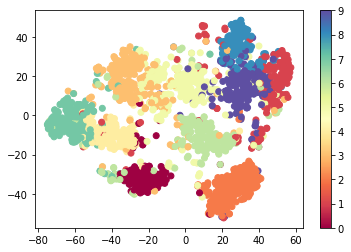

In [69]:
plt.figure()
plt.scatter(newMat[:, 0], newMat[:, 1], c=ypred, cmap=plt.cm.Spectral)
plt.colorbar()
plt.savefig("img_rapport/tsn_test_bruit.png")
plt.show()

In [70]:
uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)

In [71]:
alltrainx_noisy2 = np.where(alltrainx>1, 1, 0)
alltestx_noisy2 = np.where(alltestx>1, 1, 0)
alltrainx = MinMaxScaler().fit_transform(alltrainx)
alltestx = MinMaxScaler().fit_transform(alltestx)

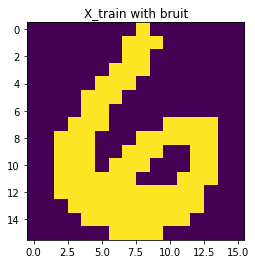

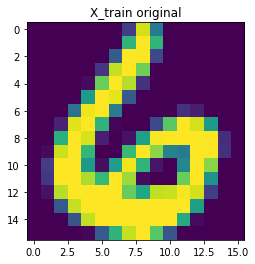

In [73]:
plt.figure()
plt.title('X_train with bruit')
plt.imshow(alltrainx_noisy2[0].reshape(16,16))
plt.savefig("img_rapport/x_train_with_bruit2")
plt.show()
plt.figure()
plt.title('X_train original')
plt.imshow(alltrainx[0].reshape(16,16))
plt.savefig("img_rapport/x_train_ori2")
plt.show()

In [74]:
lin1 = Linear(256, 100)
lin2 = Linear(100, 10)
lin3 = Linear(10, 100)
lin4 = Linear(100, 256)

ae = Sequentiel(lin1,
                TanH(),
                lin2,
                TanH(),
                lin3,
                TanH(),
                lin4,
                Sigmoid()
                )

n_iter = 1000
ep = 1e-3
sq, loss = mini_SGD(ae,alltrainx_noisy2, alltrainx, batch_size=100,eps=ep, loss_fonction=BCELoss(),nb_iteration=n_iter)

iteration 0 loss = 12105.756955052228
iteration 20 loss = 10758.72410053709
iteration 40 loss = 9631.536528208406
iteration 60 loss = 9972.406004211742
iteration 80 loss = 9359.275710140173
iteration 100 loss = 10069.409202674211
iteration 120 loss = 10185.208337526225
iteration 140 loss = 9168.339445481233
iteration 160 loss = 8918.9665557287
iteration 180 loss = 8998.150887980035
iteration 200 loss = 9410.595367695001
iteration 220 loss = 8672.403761909864
iteration 240 loss = 8370.561978690368
iteration 260 loss = 9204.274791534734
iteration 280 loss = 8936.940652561461
iteration 300 loss = 8382.53974349993
iteration 320 loss = 8929.1044286838
iteration 340 loss = 8133.981244534356
iteration 360 loss = 8444.611210188856
iteration 380 loss = 8019.742658858385
iteration 400 loss = 7450.7128607848135
iteration 420 loss = 8528.784739849632
iteration 440 loss = 8368.721735293875
iteration 460 loss = 7981.305844404814
iteration 480 loss = 8099.7992812568455
iteration 500 loss = 8045.47792

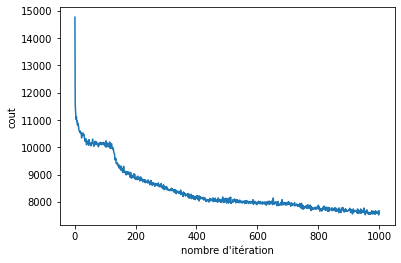

In [75]:
plt.figure()
plt.plot(range(1,n_iter+1),loss)
plt.xlabel("nombre d'itération")
plt.ylabel('cout')
plt.savefig("img_rapport/cout_auto_bruit2")
plt.show()

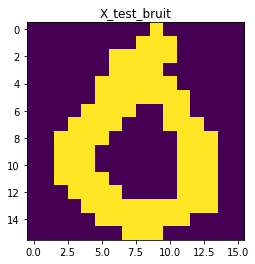

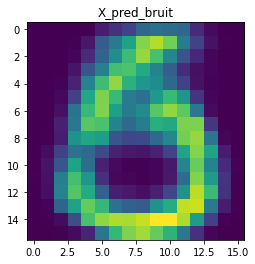

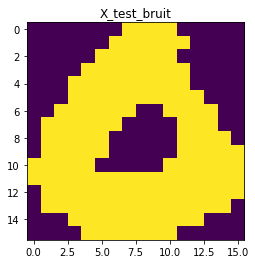

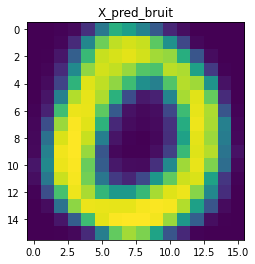

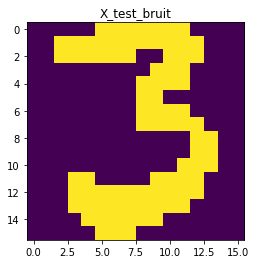

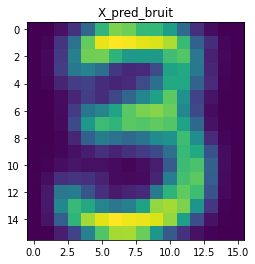

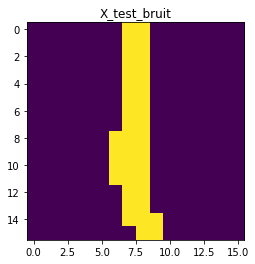

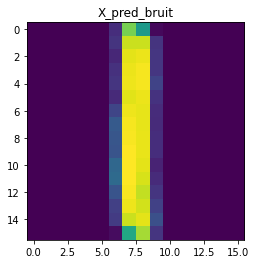

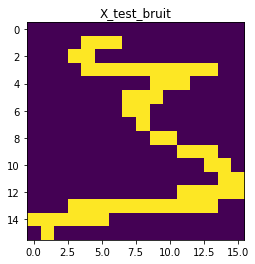

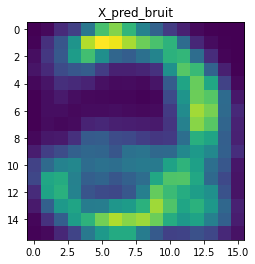

In [77]:
for j in range(len(idx)):
    i = idx[j]
    plt.title('X_test_bruit')
    plt.imshow(alltestx_noisy2[i].reshape(16,16))
    plt.savefig("img_rapport/X_test_bruit2-"+str(j))
    plt.show()
    Xhat = ae.forward(alltestx_noisy2)[-1]

    plt.title('X_pred_bruit')
    plt.imshow(Xhat[i].reshape(16,16))
    plt.savefig("img_rapport/X_pred_bruit2-"+str(j))
    plt.show()

In [78]:
km = KMeans(n_clusters=10)

In [84]:
ypred = km.fit_predict(Xhat)
print('La pureté des clusters pour test :', homogeneity_score(alltesty,ypred))

La pureté des clusters pour test : 0.5941109359001544


In [80]:
pca_tsne = TSNE(n_components=2)  
newMat = pca_tsne.fit_transform(alltestx) 

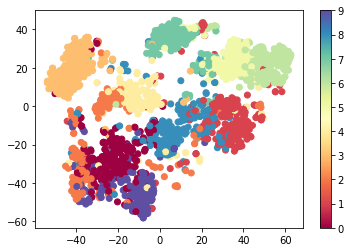

In [81]:
plt.figure()
plt.scatter(newMat[:, 0], newMat[:, 1], c=ypred, cmap=plt.cm.Spectral)
plt.colorbar()
plt.savefig("img_rapport/tsn_test_bruit2.png")
plt.show()